In [26]:
%matplotlib inline
import cv2
from skimage.filters import prewitt
from skimage.morphology import remove_small_objects
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np
import glob

In [121]:
def chop_image(image_path):
    """Chop images and plot them on a grid
    
    Inputs
    - image_path: path to the image file in .jpg format
    
    """
    image_rgb = cv2.imread(image_path)
    
    #read image in grayscale
    image = cv2.imread(image_path,0)
    
    #edge preserving smoothing
    im1 = cv2.bilateralFilter(image, 40, 500, 500)
    
    #eliminate differences in lighting by taking a gradient over the image
    im2  = prewitt(im1)
    
    #thresholding
    im3 = im2 >0.0025
    
    #removing specks to preserve only the larger patch boundaries
    im4 = remove_small_objects(im3,min_size=100)
    
    #converting bool to int
    im5 = np.int8(im4)
    
    #adding all intensities on the X axis
    horizontal = np.sum(im5,axis=0)
    vertical = np.sum(im5, axis = 1)
    
    h_pos, h_heights = find_peaks(horizontal, height = np.max(horizontal) * 0.25, distance = 500)
    v_pos, v_heights = find_peaks(vertical, height = np.max(vertical) * 0.25, distance = 500)

    print(image_path, len(h_pos), len(v_pos))
    fig, axes = plt.subplots( len(v_pos)-1,len(h_pos)-1)

    for h in range(len(h_pos)-1) :
        for v in range(len(v_pos)-1):
            
            start_h = h_pos[h]
            end_h = h_pos[h+1]

            start_v = v_pos[v]
            end_v = v_pos[v+1]
            
            #axes[v,h].imshow(image[start_v:end_v,start_h:end_h], cmap = 'gray')
            image_idx = str((len(v_pos) - 1) * h + v + 1)
            
            new_file_name =  image_path.split('/')[0] + '/patches/' +  \
                             image_path.split('/')[1].split('.jpg')[0] + \
                             '_' + image_idx + '.jpg'
            #print( v,h,image_idx, new_file_name)
            cv2.imwrite(new_file_name, image_rgb[start_v:end_v,start_h:end_h, :],)

In [122]:
def get_files(folder, pattern):
    filenames = glob.glob(folder + '/' + pattern + '*')
    for file in filenames:
        chop_image(file)
        #plt.show()

02-15-2019/cropped_002-1958-8.jpg 3 6
02-15-2019/cropped_002-1958-B2.jpg 3 5
02-15-2019/cropped_002-1958-B1.jpg 3 6
02-15-2019/cropped_001-2002-8.jpg 3 6
02-15-2019/cropped_002-1958-C1.jpg 3 6
02-15-2019/cropped_002-1958-C2.jpg 3 6
02-15-2019/cropped_001-2002-7.jpg 3 6
02-15-2019/cropped_001-2002-6.jpg 3 6
02-15-2019/cropped_001-2002-4.jpg 3 6
02-15-2019/cropped_001-2002-5.jpg 3 6
02-15-2019/cropped_001-2002-1.jpg 3 6
02-15-2019/cropped_001-2002-2.jpg 3 6
02-15-2019/cropped_001-2002-3.jpg 3 6
02-15-2019/cropped_001-2002-C2.jpg 3 6
02-15-2019/cropped_002-1958-PP1.jpg 2 5
02-15-2019/cropped_002-1958-1.jpg 3 5
02-15-2019/cropped_001-2002-PP1.jpg 3 6
02-15-2019/cropped_002-1958-ACDS.jpg 3 6
02-15-2019/cropped_001-2002-C1.jpg 3 6
02-15-2019/cropped_002-1958-2.jpg 3 6
02-15-2019/cropped_002-1958-3.jpg 3 6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


02-15-2019/cropped_002-1958-7.jpg 3 6
02-15-2019/cropped_002-1958-6.jpg 3 6
02-15-2019/cropped_001-2002-B1.jpg 3 6
02-15-2019/cropped_002-1958-4.jpg 3 6
02-15-2019/cropped_001-2002-ACDS.jpg 3 6
02-15-2019/cropped_002-1958-5.jpg 3 5
02-15-2019/cropped_001-2002-B2.jpg 3 6


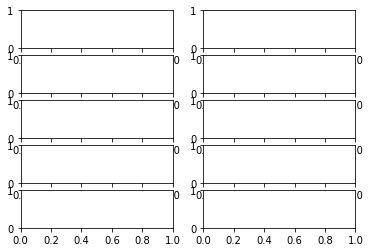

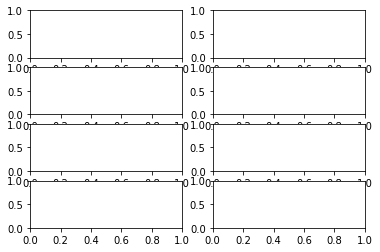

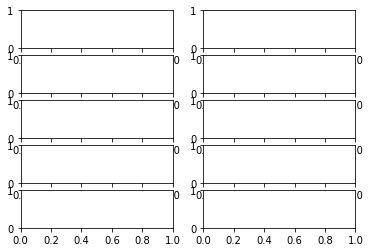

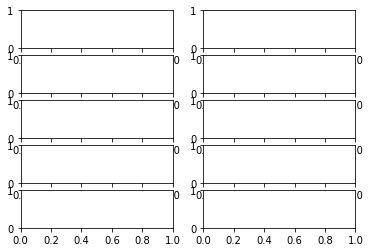

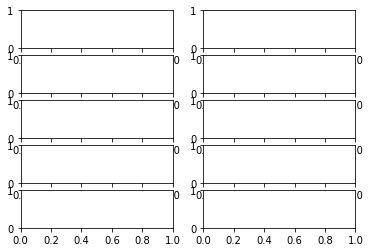

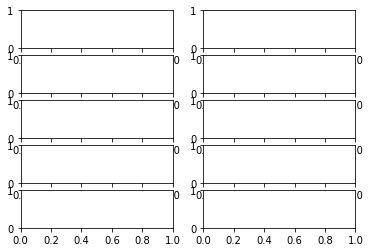

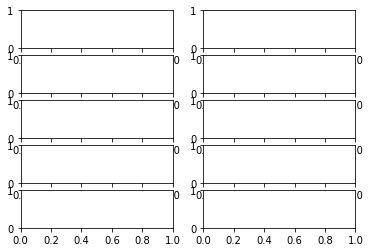

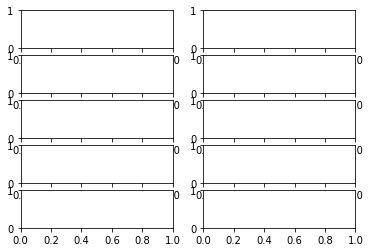

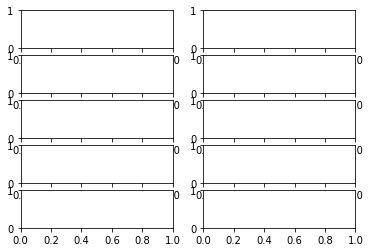

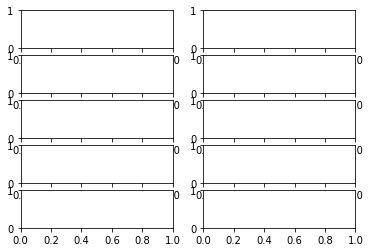

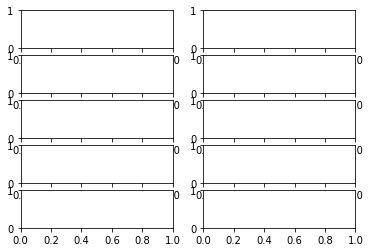

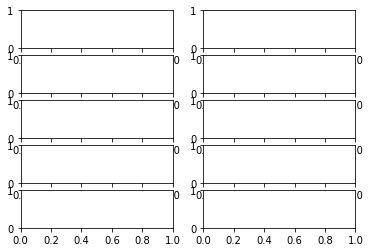

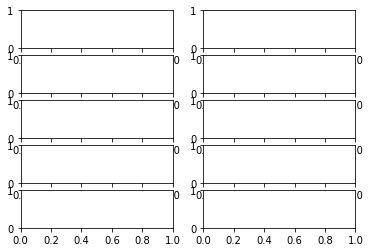

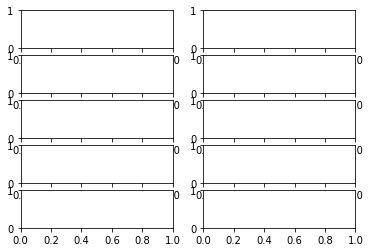

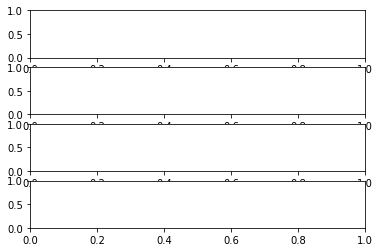

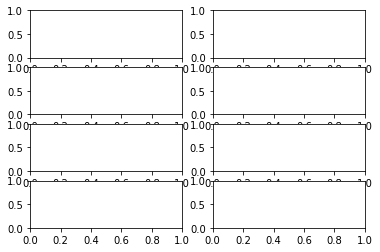

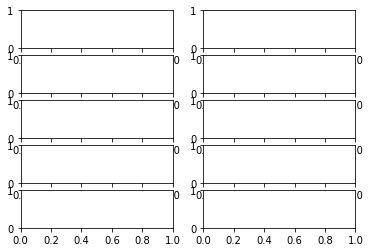

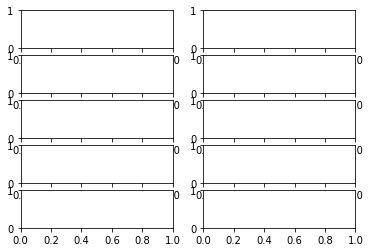

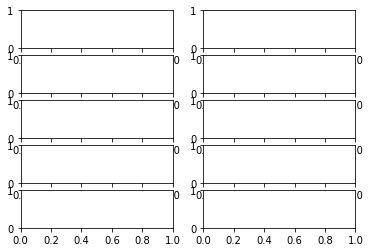

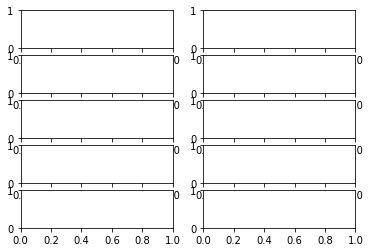

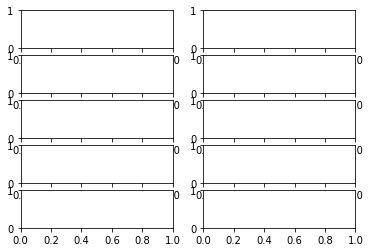

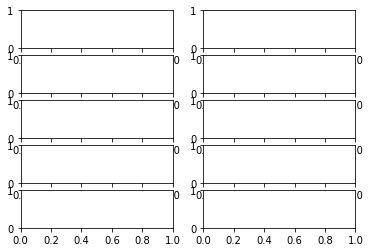

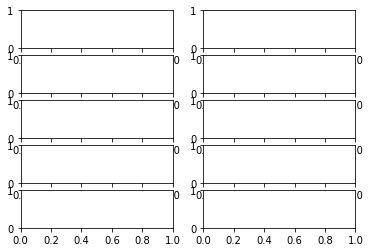

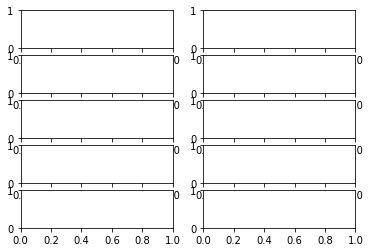

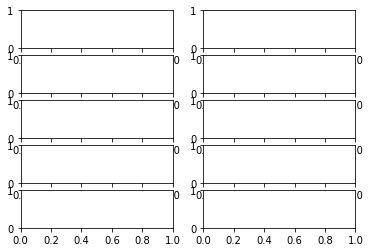

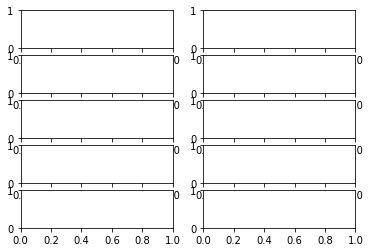

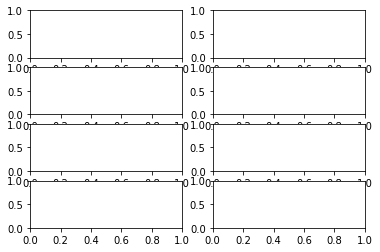

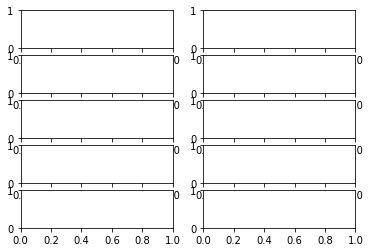

In [123]:
get_files('02-15-2019', 'cropped_')

In [124]:
plt.close()